<a href="https://colab.research.google.com/github/keran-w/Projects-in-ML-and-AI/blob/main/wangk16_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# connect to google drive
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/drive', force_remount=True)
clear_output()

#### Task 1 (10 points): 

Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.

The problem I am going to solve is to predict whether a patient has diabetes or not, which is a binary classification problem. Logistic regression works well for this type of problem that the prediction is either 0(no) or 1(yes), so I use logistic regression.

#### Task 2 (20 points): 

Pick a publicly available dataset (except The Titanic Dataset because we
already discussed that in class) that you will use to solve this problem. You must provide a link
to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the
steps you follow for your EDA with a justification of why these were required. For example, if
the dataset has lot of missing values, then why did you use a specific technique when handling
missing data. This task may include data visualization 

In [101]:
# import dataset from kaggle
# dataset link https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
import os
if not os.path.isfile('~/.kaggle/kaggle.json'):
    os.system('mkdir ~/.kaggle')
    os.system('cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json')
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip -d .

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace ./diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./diabetes.csv          


In [102]:
# read file using pandas
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
# Exploratory Data Analysis (EDA) for checking empty values and data type
# and each column has 768 non-null values, which match the total number of rows 768
# therefore, there is no empty entry
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
# Exploratory Data Analysis (EDA) for finding categorical column
# The numbers of unique data in each column are enough to show that 
# all data other than the outcome(target) column are numerical data
print(data.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [105]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [106]:

# sns.displot(data)
# plt.show()

In [107]:
# get X and y from data and convert the type to numpy
X = data.copy()
Y = X.pop('Outcome')
X, Y = X.values, Y.values
n, m = X.shape

#### Task 3 (35 points): 

Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form.

#### Task 4 (35 points): 

Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why or why not should we use optimization
algorithms for the task at hand.

In [108]:
import time
from tqdm import tqdm
import numpy as np
# define sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# training hyperparameters
beta_1, beta_2, gamma = 0.9, 0.999, 0.9

# batch geradient descent
def train(grad_type, n_iter, batch_size=32, learning_rate=1e-4, optimizer=None):
    # init weight and bias
    import numpy as np
    w = np.random.random(size=m) / 1000
    b = np.random.random()

    # init progress bar
    pbar = tqdm(range(n_iter))

    cost_list, acc_list = [], []
    for i in pbar:
        
        if grad_type == 'batch':
            idx_list = [np.arange(n)]
        elif grad_type == 'mini-batch':
            idx_list = np.split(np.arange(n), n // batch_size, axis=0)
        elif grad_type == 'stochastic':
            idx_list = [sorted(np.arange(n), key=lambda k: np.random.random())]
        else:
            raise

        pbar.set_description_str(f'k = {i}')
        m_dw, m_db, u_dw, u_db, v_dw, v_db = 0, 0, 0, 0, 0, 0
        costs = []
        for idx in idx_list:
            X_, Y_ = X[idx], Y[idx]
            A = sigmoid(np.dot(X_, w.T) + b)
            dw = np.dot((A-Y_).T, X_)/n
            db = np.sum(A-Y_)/n
            cost = -1/m * np.sum(Y_ * np.log(A) + (1-Y_) * (np.log(1-A)))
            costs.append(cost)
            
            if optimizer is None:
                w = w - learning_rate * dw
                b = b - learning_rate * db
            elif optimizer == 'Adam':
                m_dw = beta_1 * m_dw + (1 - beta_1) * dw
                m_db = beta_1 * m_db + (1 - beta_1) * db

                u_dw = beta_2 * u_dw + + (1- beta_2)*(dw**2)
                u_db = beta_2 * u_db + + (1- beta_2)* (db**2)

                w = w - learning_rate * m_dw / (1- beta_1 ** (i + 1)) / (np.sqrt(u_dw / (1- beta_2 ** (i + 1))) + 10e-8)
                b = b - learning_rate * m_db / (1- beta_1 ** (i + 1)) / (np.sqrt(u_db / (1- beta_2 ** (i + 1))) + 10e-8)
            
            elif optimizer == 'momentum':
                v_dw = gamma * v_dw + learning_rate * dw
                v_db = gamma * v_db + learning_rate * db
                w = w - v_dw
                b = b - v_db
            else:
                raise

        preds = np.round(sigmoid(np.dot(X, w.T) + b))
        acc = (preds == Y).mean()
        pbar.set_postfix_str(f'acc = {acc:.4f}')
        cost_list.append(np.mean(costs))
        acc_list.append(acc)
        # time.sleep(0.1) # for displaying training metrics(accuracy) slower 
    return cost_list, acc_list

In [109]:
# visualize training results
def visualize_training(cost_list_1, cost_list_2, cost_list_3, acc_list_1, acc_list_2, acc_list_3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
    ax1.plot(cost_list_1, label='original')
    ax1.plot(cost_list_2, label='Adam')
    ax1.plot(cost_list_3, label='momentum')
    ax1.legend()
    ax1.set_title('cost')
    ax2.plot(acc_list_1, label='original')
    ax2.plot(acc_list_2, label='Adam')
    ax2.plot(acc_list_3, label='momentum')
    ax2.set_ylim([0,1])
    ax2.legend()
    ax2.set_title('accuracy')
    plt.show()

k = 999: 100%|██████████| 1000/1000 [00:08<00:00, 114.19it/s, acc = 0.6706]


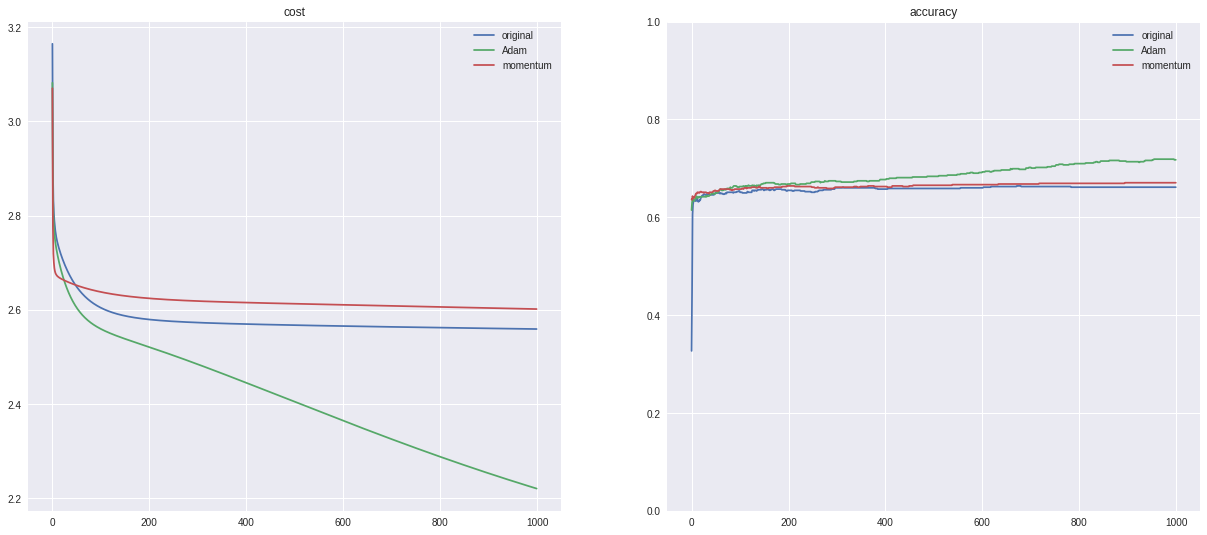

In [110]:
# using mini-batch gradient descent and compare three optimizer results
grad_type = 'mini-batch'
n_iter = 5000
cost_list_1, acc_list_1 = train(grad_type, n_iter, learning_rate=1e-4, optimizer=None)
cost_list_2, acc_list_2 = train(grad_type, n_iter, learning_rate=1e-4, optimizer='Adam')
cost_list_3, acc_list_3 = train(grad_type, n_iter, learning_rate=5e-4, optimizer='momentum')
visualize_training(cost_list_1, cost_list_2, cost_list_3, acc_list_1, acc_list_2, acc_list_3)

k = 999: 100%|██████████| 1000/1000 [00:06<00:00, 143.55it/s, acc = 0.6484]


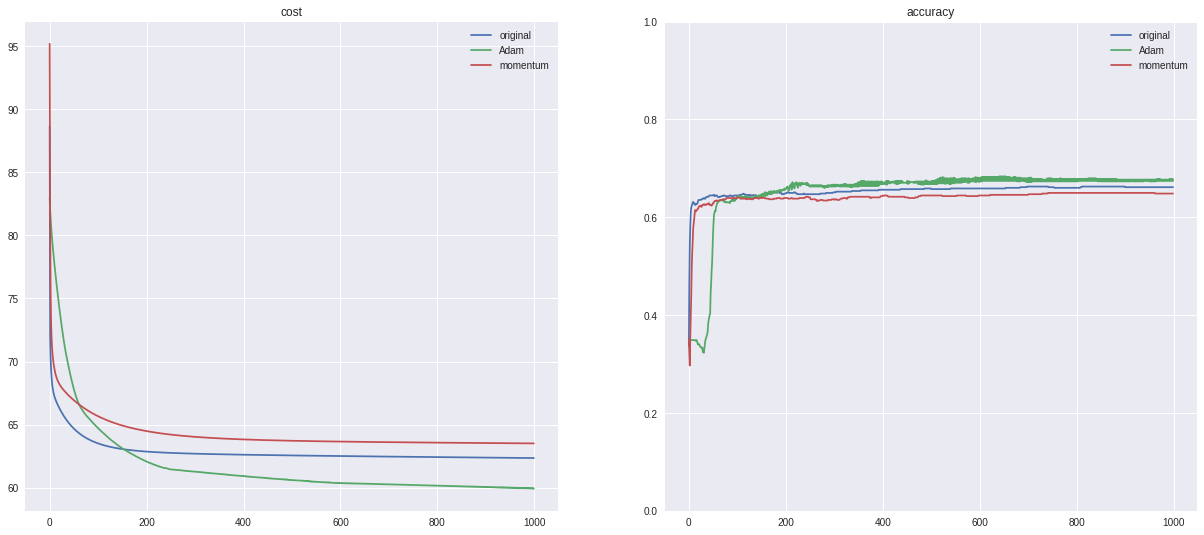

In [117]:
# using batch gradient descent and compare three optimizer results
grad_type = 'batch'
cost_list_1, acc_list_1 = train(grad_type, n_iter, learning_rate=1e-4, optimizer=None)
cost_list_2, acc_list_2 = train(grad_type, n_iter, learning_rate=1e-4, optimizer='Adam')
cost_list_3, acc_list_3 = train(grad_type, n_iter, learning_rate=5e-5, optimizer='momentum')
visualize_training(cost_list_1, cost_list_2, cost_list_3, acc_list_1, acc_list_2, acc_list_3)

k = 999: 100%|██████████| 1000/1000 [00:08<00:00, 120.70it/s, acc = 0.6576]


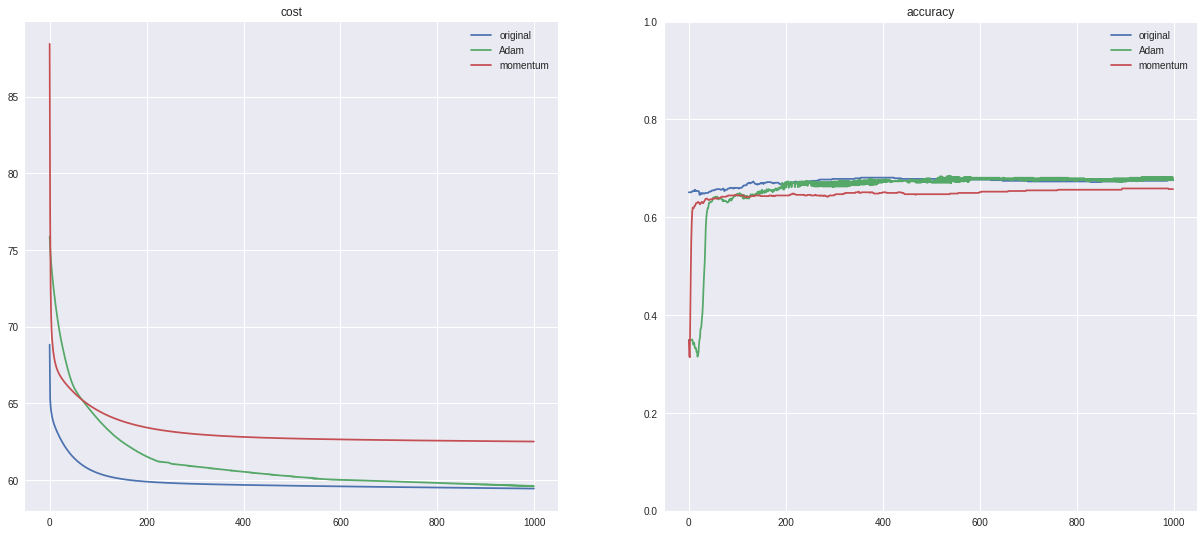

In [118]:
# using batch gradient descent and compare three optimizer results
grad_type = 'stochastic'
cost_list_1, acc_list_1 = train(grad_type, n_iter, learning_rate=1e-4, optimizer=None)
cost_list_2, acc_list_2 = train(grad_type, n_iter, learning_rate=1e-4, optimizer='Adam')
cost_list_3, acc_list_3 = train(grad_type, n_iter, learning_rate=5e-5, optimizer='momentum')
visualize_training(cost_list_1, cost_list_2, cost_list_3, acc_list_1, acc_list_2, acc_list_3)

In [113]:
# Side note: use logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000).fit(X, Y)
(clf.predict(X) == Y).mean()

0.78125